# **Packages**

In [109]:
!pip install openpyxl

In [7]:
import pandas as pd
import numpy as np

In [11]:
df=pd.read_excel('avances.xlsx')
df.shape

(411, 47)

In [12]:
df=pd.read_excel('avances.xlsx', usecols=[0,1,2,3,4,5,6,7,9,11,15])
df.dropna(inplace=True)
df.shape

(411, 11)

In [10]:
df.sample(n=1)

,FECHA,TURNO,EQUIPO,OPERADOR,INGENIERO,GUARDIA,NIVEL,LABOR,SUB ZONA,AVANCE REAL,TIPO DE DISPARO
140,2022-03-01,NOCHE,J-37,"COLLAZOS COLLAZOS, YOEL","SOSA NUÑES, FREDI",C,20A,GL 159 SW,PROFUNDIZACIÓN,3.29,AVANCE


In [13]:
df['OPERADOR']=df['OPERADOR'].apply(lambda x: x.split(' ')[0])
df['INGENIERO']=df['INGENIERO'].apply(lambda x: x.split(' ')[0])

In [16]:
df.sample(n=1)

,FECHA,TURNO,EQUIPO,OPERADOR,INGENIERO,GUARDIA,NIVEL,LABOR,SUB ZONA,AVANCE REAL,TIPO DE DISPARO
260,2022-03-09,DÍA,J-34,TORRES,LLACSA,C,12A,GL 574 SW,INTERMEDIA,3.2,AVANCE


In [17]:
filt=(df['AVANCE REAL']>=3.1)
df[filt]

,FECHA,TURNO,EQUIPO,OPERADOR,INGENIERO,GUARDIA,NIVEL,LABOR,SUB ZONA,AVANCE REAL,TIPO DE DISPARO
1,2022-02-20,NOCHE,J-9,QUICHCA,CUEVA,A,18,XC 424 NW,BAJA,3.29,AVANCE
2,2022-02-20,NOCHE,J-15,VENTURA,TACO,A,19,XC 338 SE,PROFUNDIZACIÓN,3.33,AVANCE
5,2022-02-20,NOCHE,J-21,COMUN,SANCHEZ,A,21C,BP 954 SW,NV-21,3.20,AVANCE
6,2022-02-21,DÍA,J-9,APOLINARIO,HUAMANI,C,16,BP 412 SE,BAJA,3.47,AVANCE
11,2022-02-21,DÍA,J-9,APOLINARIO,HUAMANI,C,19,XC 338 SE,PROFUNDIZACIÓN,3.35,AVANCE
...,...,...,...,...,...,...,...,...,...,...,...
395,2022-03-18,NOCHE,J-30,VARGAS,GAMIO,C,21,XC 160 SW,NV-21,3.10,AVANCE
403,2022-03-19,DÍA,J-9,RAMOS,PRIETO,B,19A,GL 370 NE,BAJA,3.40,AVANCE
404,2022-03-19,DÍA,J-30,GAVE,PEZO,B,21,GL 086,NV-21,3.10,AVANCE
405,2022-03-19,NOCHE,J-9,APOLINARIO,HUAMANI,C,17,XC 545 NE,BAJA,3.17,AVANCE


In [28]:
filt=(df['AVANCE REAL']>=3.1)
df[filt].groupby(['INGENIERO']).mean().sort_values(by='AVANCE REAL')

,AVANCE REAL
INGENIERO,
GAMIO,3.223750
SANCHEZ,3.250000
PEZO,3.290000
QUISPE,3.303636
CHAMORRO,3.311000
SOSA,3.359697
LLACSA,3.362778
HUAMANI,3.376667
CUEVA,3.385000


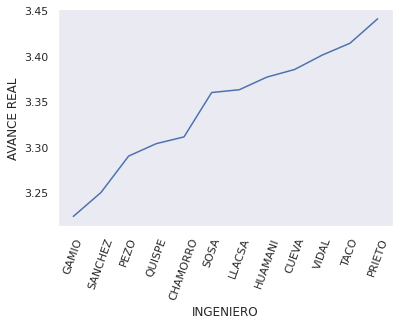

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
  
# loading dataset
data = df[filt].groupby(['INGENIERO']).mean().sort_values(by='AVANCE REAL')
  
# draw lineplot
fig=sns.lineplot(x="INGENIERO", y="AVANCE REAL", data=data)
sns.set(style='dark',)
fig.tick_params(axis='x', rotation=70)
plt.show()


### Report by ing

In [18]:
df.groupby(['INGENIERO','TIPO DE DISPARO']).first()

FECHA  TURNO EQUIPO    OPERADOR GUARDIA  \
INGENIERO TIPO DE DISPARO                                                  
CHAMORRO  AVANCE            2022-02-23    DÍA   J-34        CUBA       B   
          AVANCE DEFICIENTE 2022-02-24    DÍA   J-34        CUBA       B   
          SELLADA           2022-03-06  NOCHE   J-34  TORDECILLA       B   
CUEVA     AVANCE            2022-02-20  NOCHE    J-9     QUICHCA       A   
          AVANCE DEFICIENTE 2022-02-20  NOCHE    J-9     QUICHCA       A   
          SELLADA           2022-03-05    DÍA   J-37     QUICHCA       A   
GAMIO     AVANCE            2022-02-21    DÍA   J-21      MOLINA       C   
          AVANCE 10FT       2022-03-10    DÍA   J-30      VARGAS       C   
          AVANCE DEFICIENTE 2022-02-24    DÍA   J-30       COSME       B   
          SELLADA           2022-03-11    DÍA   J-30      VARGAS       C   
HUAMANI   AVANCE            2022-02-21    DÍA    J-9  APOLINARIO       C   
          AVANCE 10FT       2022-03-14    DÍA    J-9  APOLINARIO       C   
          AVANCE DEFICIENTE 2022-02-21    DÍA    J-9  APOLINARIO       C   
          CONEXIÓN          2022-02-21    DÍA    J-9  APOLINARIO       C   
LLACSA    AVANCE            2022-02-23  NOCHE   J-34      TORRES       C   
          AVANCE DEFICIENTE 2022-02-22    DÍA   J-34      TORRES       C   
          DQ                2022-03-10    DÍA   J-34      TORRES       C   
          SELLADA           2022-03-15    DÍA   J-34      TORRES       C   
LOPEZ     AVANCE DEFICIENTE 2022-03-09    DÍA   J-21      MOLINA       C   
PEZO      AVANCE            2022-02-26  NOCHE   J-30      VARGAS       C   
          AVANCE DEFICIENTE 2022-02-24  NOCHE   J-21      MOLINA       C   
          SELLADA           2022-03-05  NOCHE   J-30       COSME       B   
PRIETO    AVANCE            2022-02-24    DÍA    J-9  TORDECILLA       B   
          AVANCE DEFICIENTE 2022-02-23    DÍA    J-9  TORDECILLA       B   
          SELLADA           2022-02-27    DÍA    J-9  TORDECILLA       B   
QUISPE    AVANCE            2022-03-02    DÍA   J-30    LAUREANO       A   
          AVANCE 10FT       2022-03-10  NOCHE   J-21       COMUN       A   
          AVANCE DEFICIENTE 2022-03-05    DÍA   J-30    LAUREANO       A   
          SELLADA           2022-03-09  NOCHE   J-30    LAUREANO       A   
SANCHEZ   AVANCE            2022-02-20  NOCHE   J-21       COMUN       A   
SOSA      AVANCE            2022-02-22    DÍA   J-37    COLLAZOS       C   
          AVANCE 10FT       2022-03-09    DÍA   J-30    LLANCARI       C   
          AVANCE DEFICIENTE 2022-02-22    DÍA   J-15    LLANCARI       C   
          SELLADA           2022-02-21    DÍA   J-15      CAMPOS       C   
TACO      AVANCE            2022-02-20  NOCHE   J-15     VENTURA       A   
          AVANCE DEFICIENTE 2022-02-20  NOCHE   J-15     VENTURA       A   
          SELLADA           2022-02-21  NOCHE   J-15     VENTURA       A   
VIDAL     AVANCE            2022-02-23    DÍA   J-15       ARANA       B   
          AVANCE DEFICIENTE 2022-02-25    DÍA   J-15       ARANA       B   
          CONEXIÓN          2022-03-05  NOCHE   J-15       ARANA       B   
          SELLADA           2022-02-27    DÍA   J-15       ARANA       B   

                            NIVEL             LABOR        SUB ZONA  \
INGENIERO TIPO DE DISPARO                                             
CHAMORRO  AVANCE               12         GL 598 NE      INTERMEDIA   
          AVANCE DEFICIENTE   12A         GL 574 NE      INTERMEDIA   
          SELLADA              12        EST 640 SE      INTERMEDIA   
CUEVA     AVANCE               18         XC 424 NW            BAJA   
          AVANCE DEFICIENTE    16         BP 412 SE            BAJA   
          SELLADA             19A         GL 370 NE            BAJA   
GAMIO     AVANCE              21A         BP 955 SW           NV-21   
          AVANCE 10FT          21         SN 088 SW           NV-21   
          AVANCE DEFICIENTE    21         GL 175 SW   